# This chapter is all about Probability and Python.

We often forget how unintuitive probability is and use it quite poorly in everyday life.

In [29]:
# We'll use probability theory all over the place, apparently

# The probability that if a family, having two children, and the older child is a girl, that if they have two girls is 50%
# However, the probability that a family has two children and either child is a girl, that they have two girls is only 1/3
# This is because the probability of having a boy and a girl is twice as likely in the scenario (since either the older or 
# younger child could be a girl), than having both girls. Let's test it by generating a bunch of families

import random
def random_kid():
    return random.choice(["boy", "girl",])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(100000000): # Joel does 10,000 but I have an i7 8600k so get at me 100,000,000 families
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)


P(both | older): 0.49993703922432325
P(both | either): 0.333286182373734


<function matplotlib.pyplot.show>

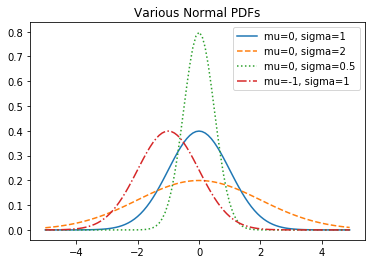

In [38]:
# PDFs and CDFs
import math
import matplotlib.pyplot as plt

def uniform_pdf(x):
    return 1 if x >= 0 and x <1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1
    
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2* math.pi)
    return (math.exp(-(x-mu) ** 2 /2 / sigma**2)/(sqrt_two_pi * sigma))

# Plotting some PDFs

xs = [x / 10.0 for x in range (-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')

plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')

plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')

plt.plot(xs, [normal_pdf(x, mu=-1, sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show


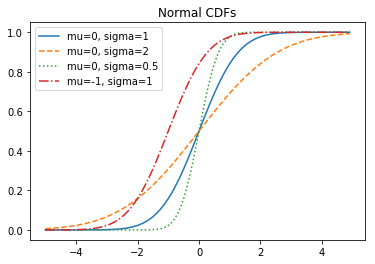

In [40]:
# the normal CDF requires some special tools
import math

def normal_cdf(x, mu=0, sigma =1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range (-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')

plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')

plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')

plt.plot(xs, [normal_cdf(x, mu=-1, sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Normal CDFs")
plt.show()


In [42]:
# Sometimes we need to find the inverse to check certain probabilities 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    # check if the cdf is standard
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 # very close to zero
    hi_z = 10.0 # very close to one
    def peter_thiel(x):
        if x == 0:
            return 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        elif mid_p > p:
            hi_z = mid_z
        else:
            break
            
    return mid_z

# This is binary search function that bisects intervals until it closes in ano a Z that's close enough (according to
# our tolerance) to the desired probability. Clever


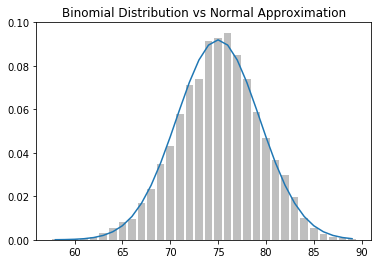

In [60]:
# Central Limit Theorem: A random variable defined as the average of a large number of independent and 
# identically distributed random variables is itself approximately normally distributed. Can see this with
# binomial variables
from collections import Counter
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    
    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    xs = list(range(min(data), (max(data) + 1)))
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()

make_hist(0.75, 100, 10000)
# neat

## For further exploration, check out the scipy.stats package which has pdfs and cdf functions for most popular distributions. Chi squared, normal, square, you name it. 

For a good book on probability, read *Introdution to Probability*
